In [ ]:
library(tidyverse)
library(corrplot)
options(warn=-1)

In [7]:
recipes <- read_csv("recipeData.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  Name = col_character(),
  URL = col_character(),
  Style = col_character(),
  BoilGravity = col_character(),
  MashThickness = col_character(),
  SugarScale = col_character(),
  BrewMethod = col_character(),
  PitchRate = col_character(),
  PrimaryTemp = col_character(),
  PrimingMethod = col_character(),
  PrimingAmount = col_character()
)
See spec(...) for full column specifications.


In [8]:
head(recipes)

BeerID Name                           
1 1      Vanilla Cream Ale              
2 2      Southern Tier Pumking clone    
3 3      Zombie Dust Clone - EXTRACT    
4 4      Zombie Dust Clone - ALL GRAIN  
5 5      Bakke Brygg Belgisk Blonde 50 l
6 6      Sierra Nevada Pale Ale Clone   
  URL                                                        
1 /homebrew/recipe/view/1633/vanilla-cream-ale               
2 /homebrew/recipe/view/16367/southern-tier-pumking-clone    
3 /homebrew/recipe/view/5920/zombie-dust-clone-extract       
4 /homebrew/recipe/view/5916/zombie-dust-clone-all-grain     
5 /homebrew/recipe/view/89534/bakke-brygg-belgisk-blonde-50-l
6 /homebrew/recipe/view/28546/sierra-nevada-pale-ale-clone   
  Style                              StyleID Size(L) OG    FG    ABV  IBU   ...
1 Cream Ale                          45      21.77   1.055 1.013 5.48 17.65 ...
2 Holiday/Winter Special Spiced Beer 85      20.82   1.083 1.021 8.16 60.65 ...
3 American IPA                        7      18.93   1.063 1.018 5.91 59.25 ...
4 American IPA                        7      22.71   1.061 1.017 5.80 54.48 ...
5 Belgian Blond Ale                  20      50.00   1.060 1.010 6.48 17.84 ...
6 American Pale Ale                  10      24.61   1.055 1.013 5.58 40.12 ...
  BoilGravity Efficiency MashThickness SugarScale       BrewMethod PitchRate
1 1.038       70         N/A           Specific Gravity All Grain  N/A      
2 1.07        70         N/A           Specific Gravity All Grain  N/A      
3 N/A         70         N/A           Specific Gravity extract    N/A      
4 N/A         70         N/A           Specific Gravity All Grain  N/A      
5 1.05        72         N/A           Specific Gravity All Grain  N/A      
6 1.047       79         N/A           Specific Gravity All Grain  1        
  PrimaryTemp PrimingMethod PrimingAmount  UserId
1 17.78       corn sugar    4.5 oz           116 
2 N/A         N/A           N/A              955 
3 N/A         N/A           N/A               NA 
4 N/A         N/A           N/A               NA 
5 19          Sukkerlake    6-7 g sukker/l 18325 
6 N/A         N/A           N/A             5889

## **Which Beer is Most Brewed?**

Selecting by count_


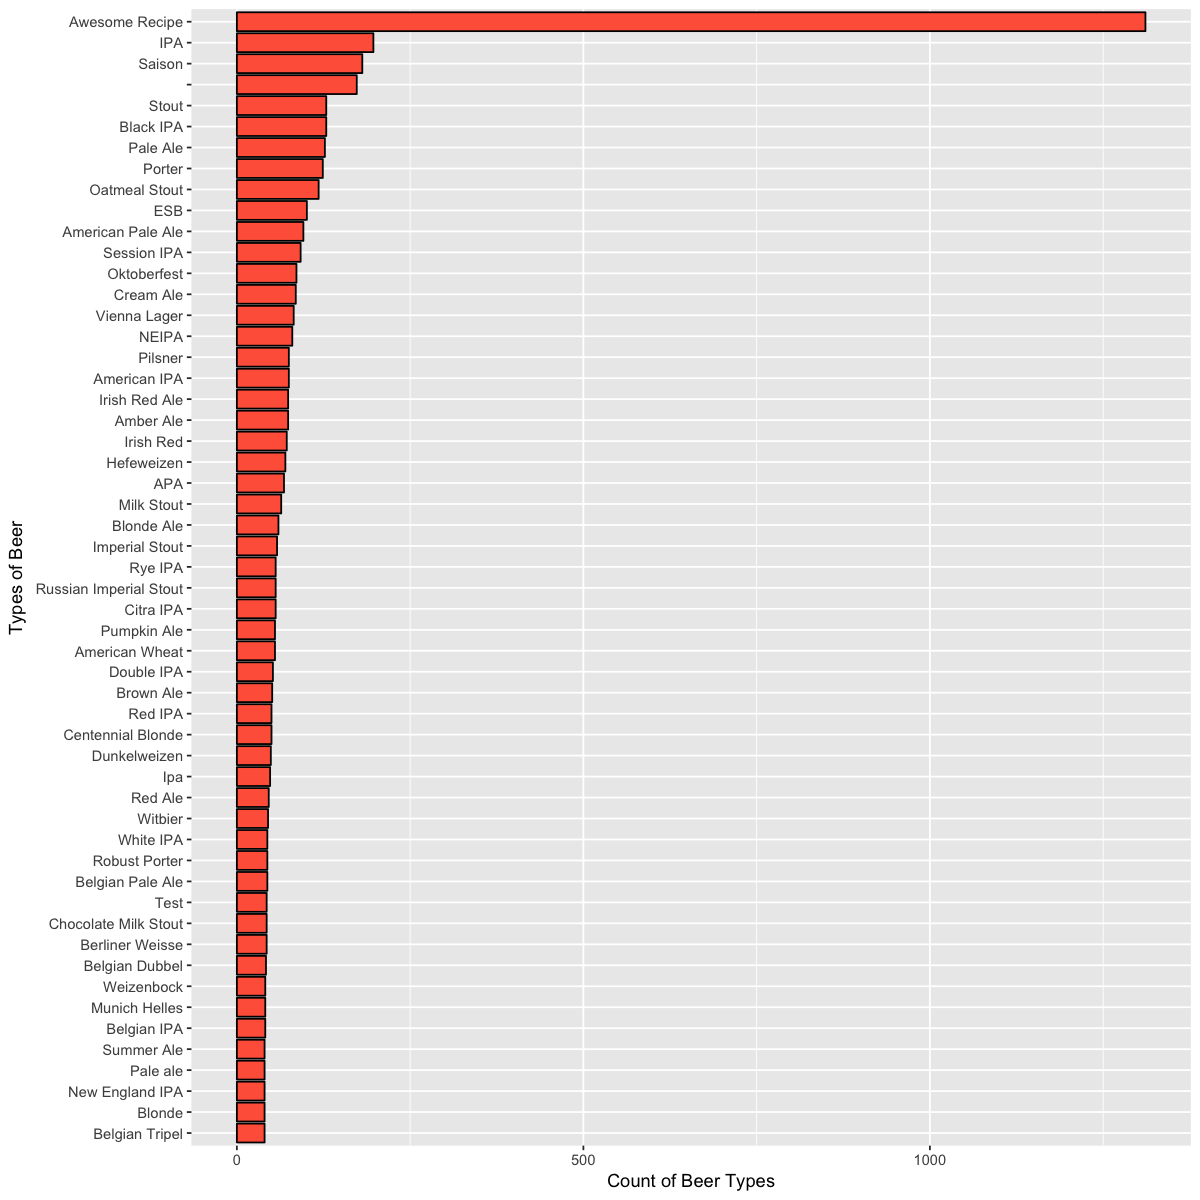

In [180]:
options(repr.plot.width = 10, repr.plot.height = 10)
recipes %>%
group_by(Name) %>%
summarise(
    count_ = length(Name),
) %>%
top_n(n = 50) %>%
ggplot(aes(reorder(Name, count_), count_))+
geom_bar(stat = "identity", fill = "tomato", color = "black")+
labs(x = "Types of Beer", y = "Count of Beer Types")+
coord_flip()

## **Style of the Beer**

Selecting by count_


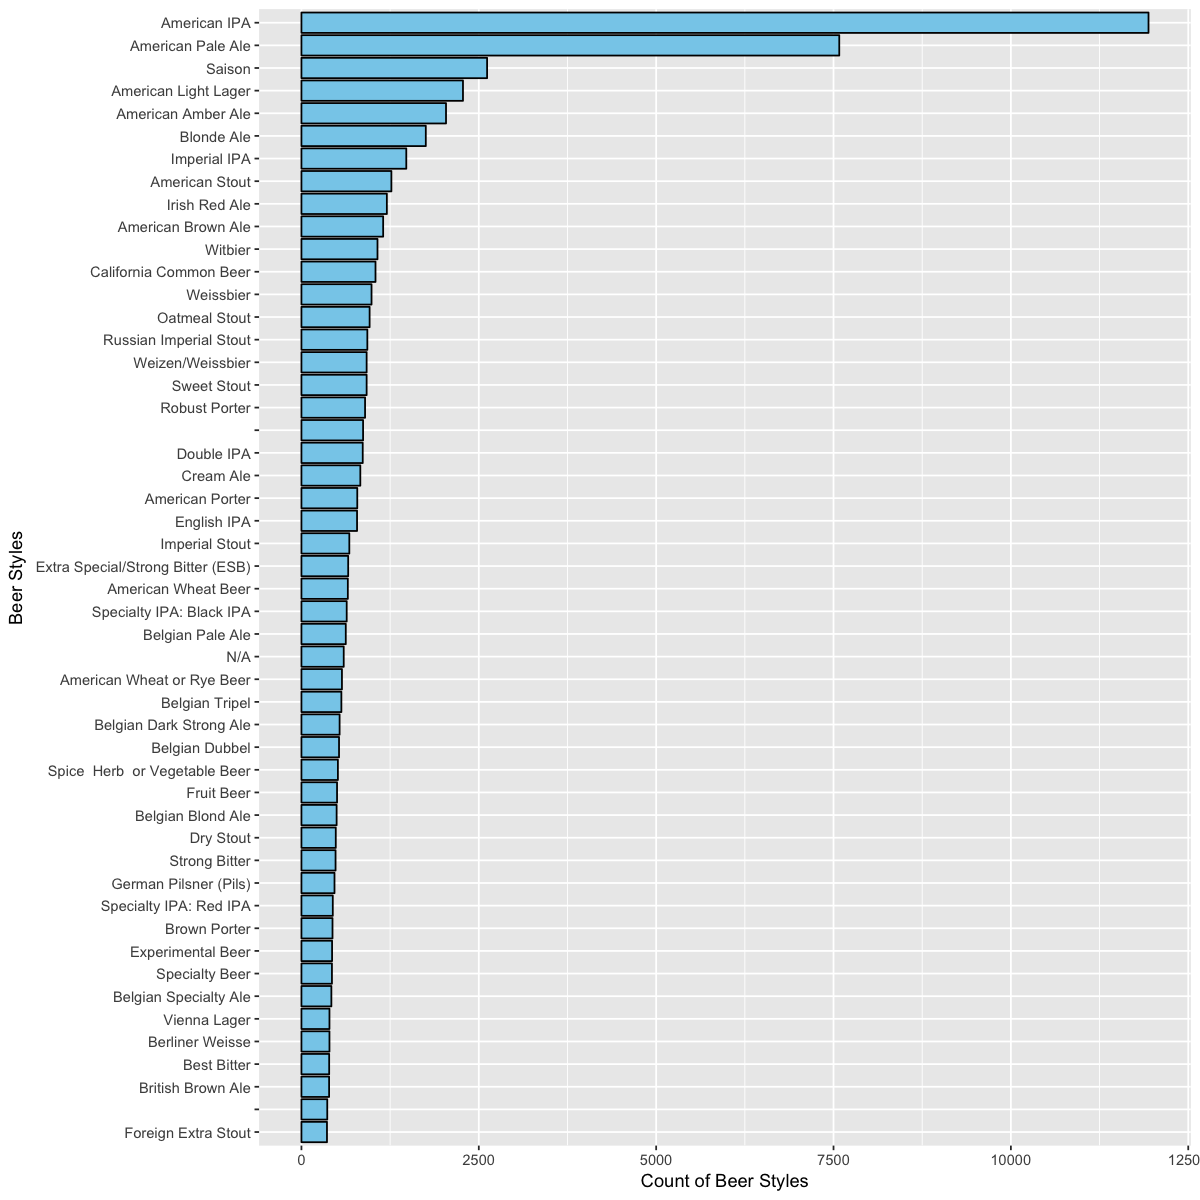

In [29]:
options(repr.plot.width = 10, repr.plot.height = 10)
recipes %>%
group_by(Style) %>%
summarise(
    count_ = length(Style),
) %>%
top_n(n = 50) %>%
ggplot(aes(reorder(Style, count_), count_))+
geom_bar(stat = "identity", fill = "skyblue", color = "black")+
labs(x = "Beer Styles", y = "Count of Beer Styles")+
coord_flip()

American IPA is the most used style of beer followed by American Pale Ale and Saison.

## **Alcohol By Volume**
Lets see which beer style has the highest mean amount of alcohol by volume

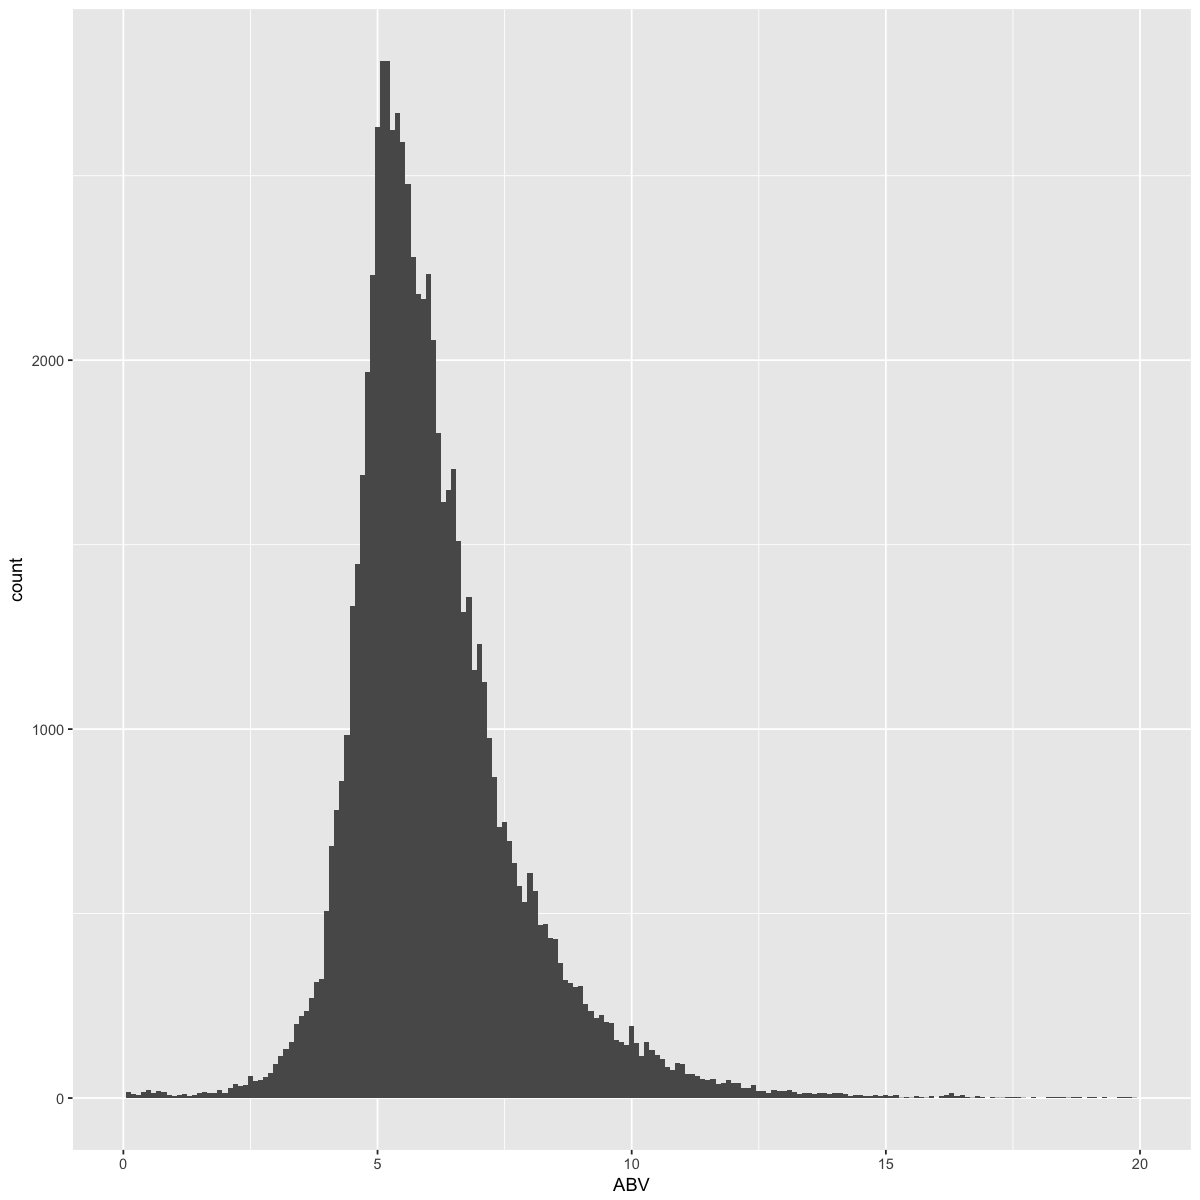

In [69]:
recipes %>%
ggplot(aes(ABV))+
geom_histogram(binwidth = 0.1)+
xlim(0, 20)

The ABV of beer follows a normal distribution with most of them concentrated around 5-6 %

Selecting by mean_abv


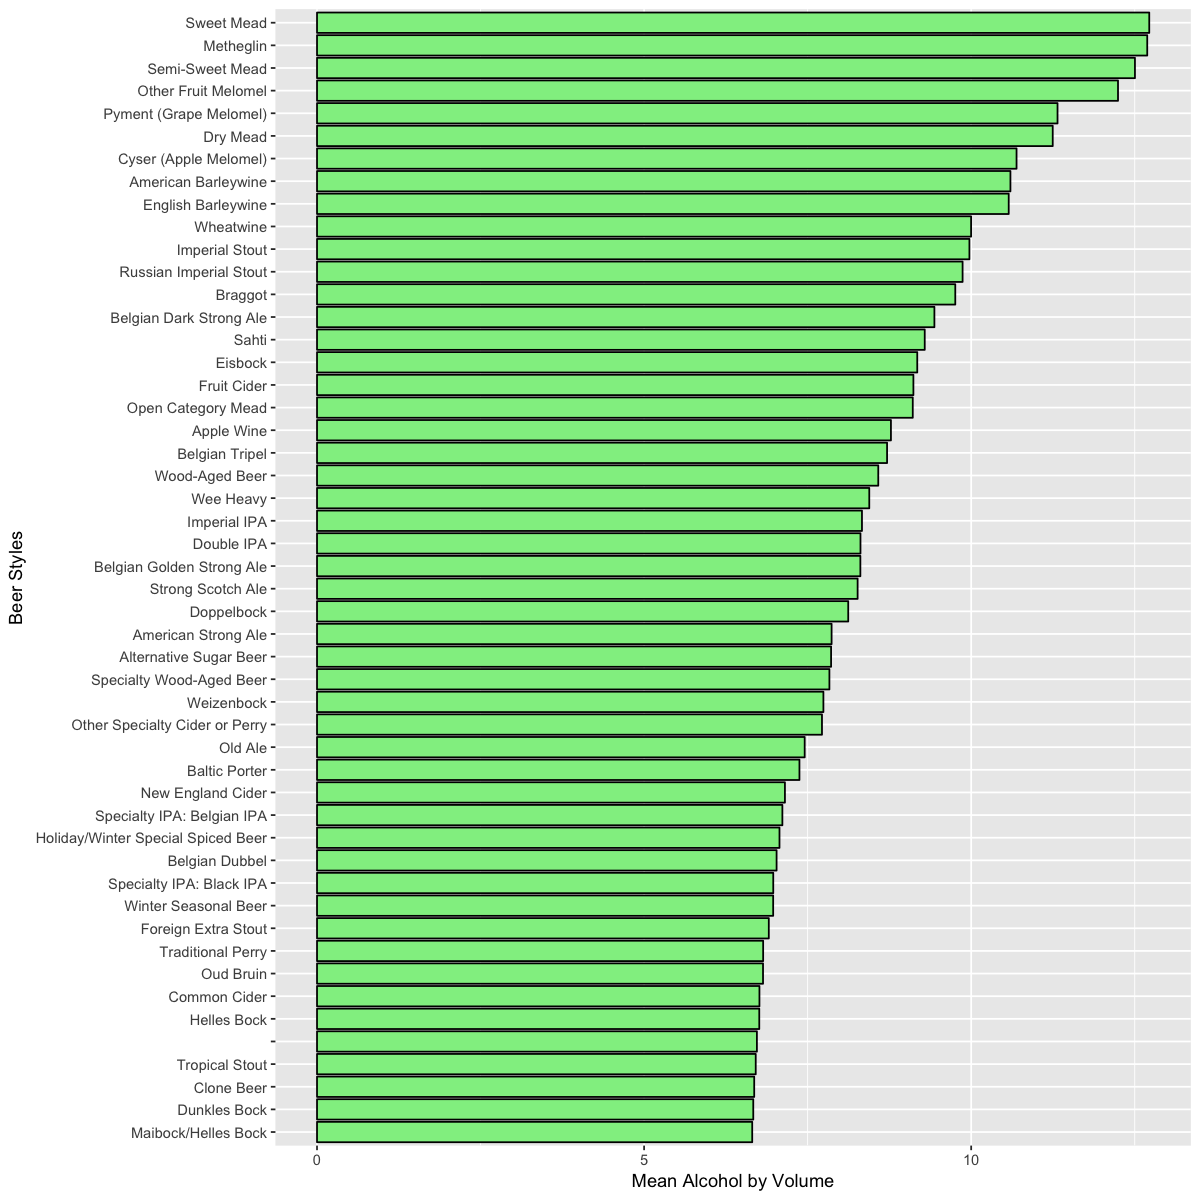

In [37]:
recipes %>%
group_by(Style) %>%
summarise(
    mean_abv = mean(ABV, na.rm = TRUE)
) %>%
top_n(n = 50) %>%
ggplot(aes(reorder(Style, mean_abv), mean_abv))+
geom_bar(stat = "identity", fill = "lightgreen", color = "black")+
labs(x = "Beer Styles", y = "Mean Alcohol by Volume")+
coord_flip()

Sweet Mead and Metheglin have almost the same and very high alcohol content by volume.

Selecting by mean_abv


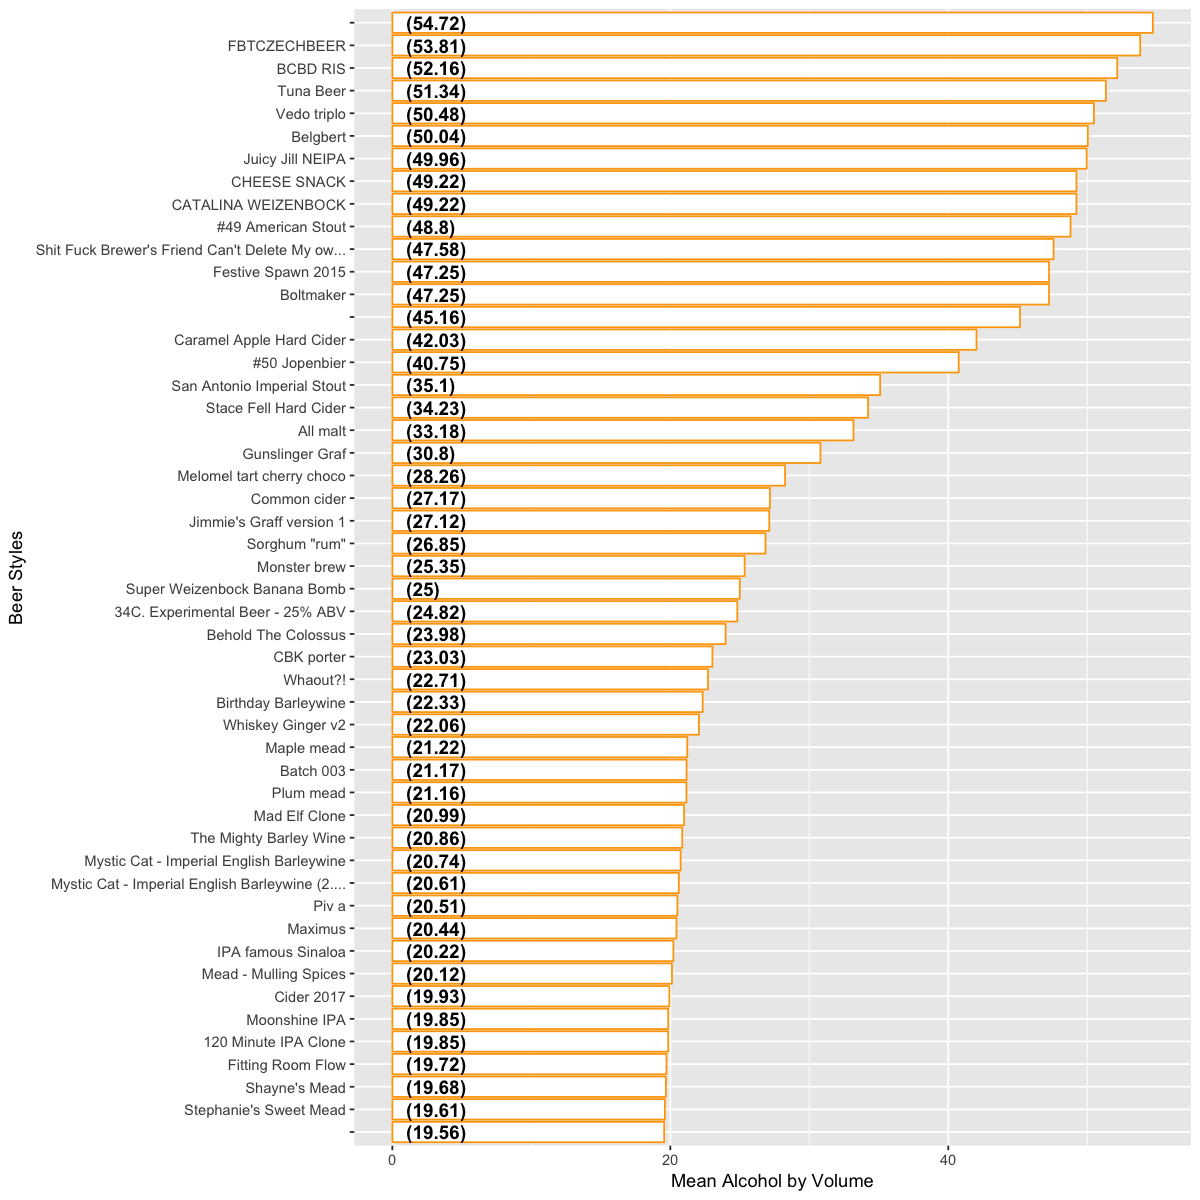

In [104]:
recipes %>%
filter(!is.na(Name)) %>%
group_by(Name) %>%
summarise(
    mean_abv = mean(ABV, na.rm = TRUE)
) %>%
top_n(n = 50) %>%
ggplot(aes(reorder(Name, mean_abv), mean_abv))+
geom_bar(stat = "identity", fill = "white", color = "orange")+
 geom_text(aes(x = Name, y = 1, label = paste0("(",mean_abv,")",sep="")),
            hjust=0, vjust=.5, size = 4, colour = 'black',
            fontface = 'bold')+
labs(x = "Beer Styles", y = "Mean Alcohol by Volume")+
coord_flip()

## **Size (L)**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


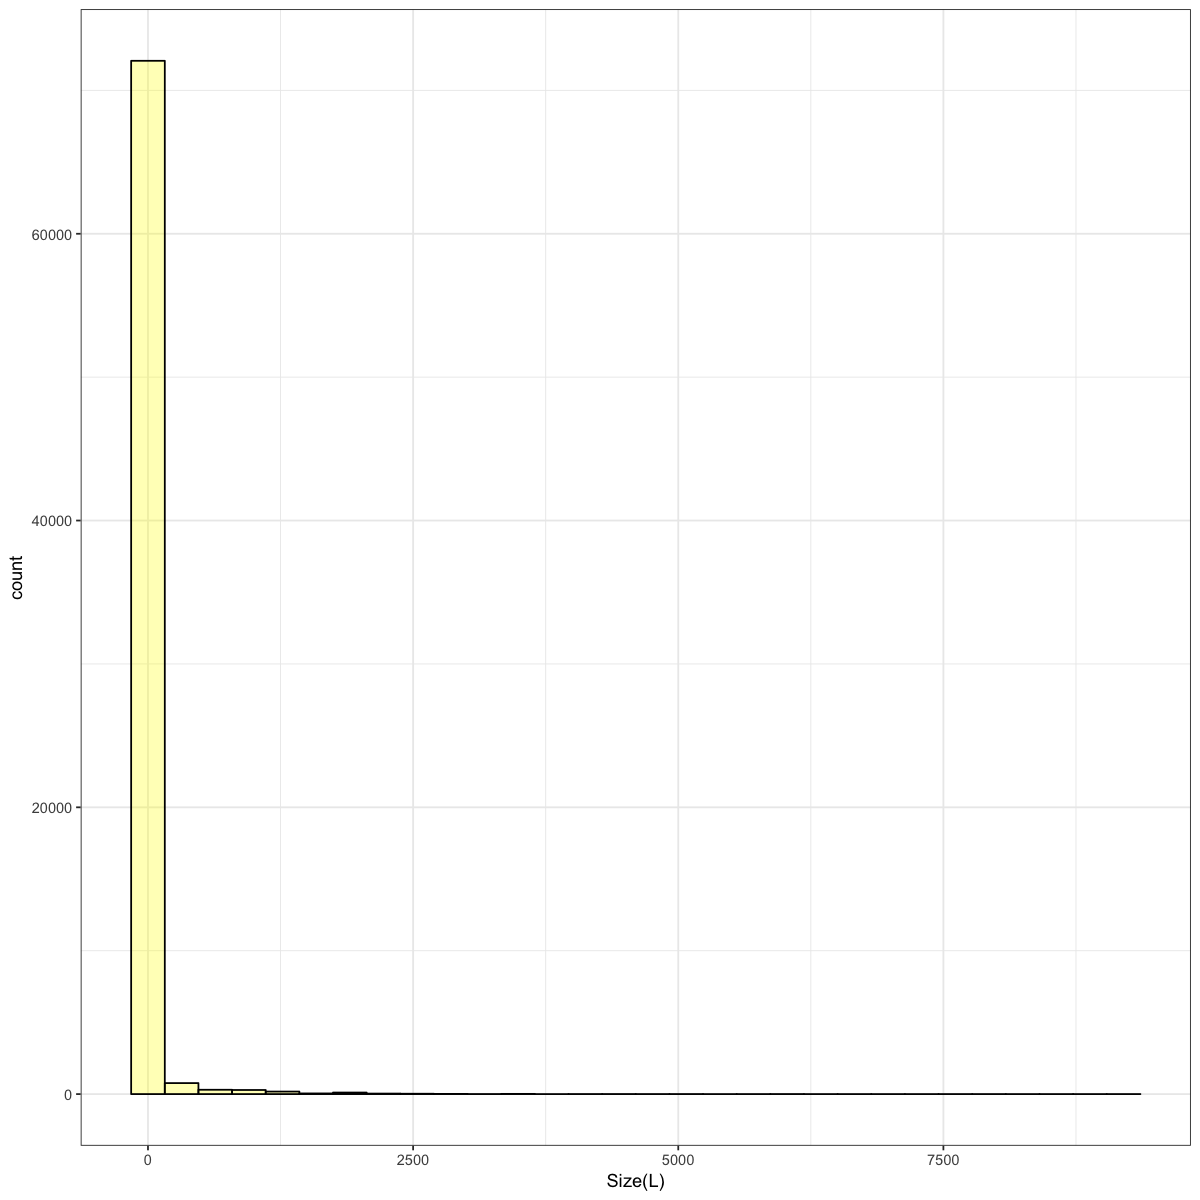

In [121]:
recipes %>%
filter(`Size(L)` != 0.0) %>%
ggplot(aes(`Size(L)`))+
geom_histogram(fill = "yellow", color = "black", alpha = 0.3)+
theme_bw()

Let us magnify the x axis to look at the distribution in depth.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


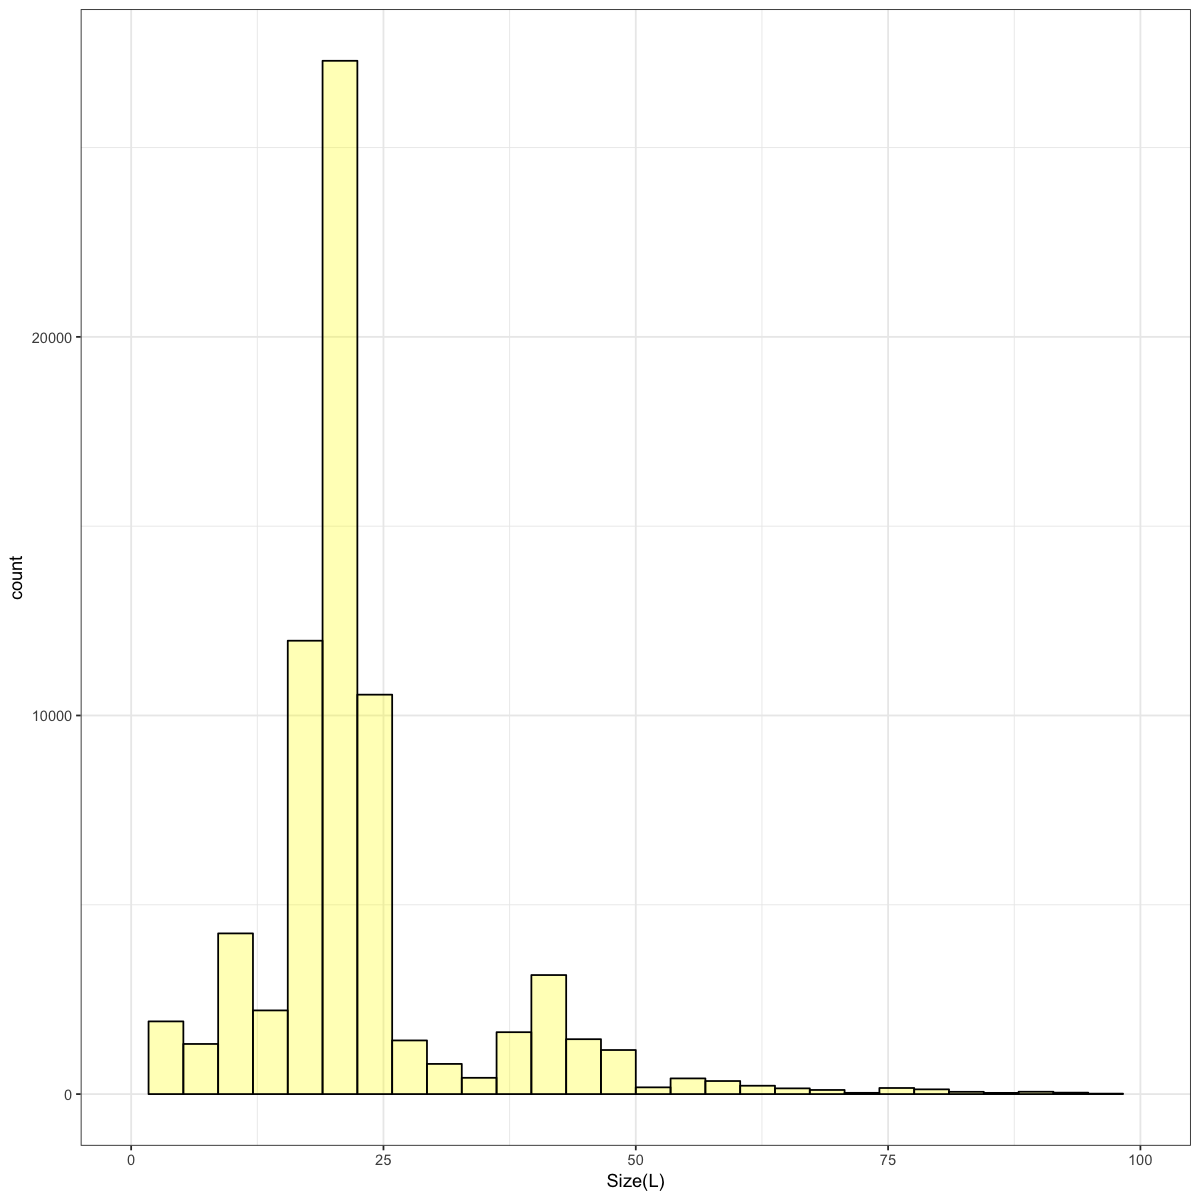

In [122]:
recipes %>%
filter(`Size(L)` != 0.0) %>%
ggplot(aes(`Size(L)`))+
geom_histogram(fill = "yellow", color = "black", alpha = 0.3)+
xlim(0, 100)+
theme_bw()

We see that the majority of beer volumes/size in which it is brewed is around 20-25 litres. However there is a dip and then a sharp peak again in the volumes around 30-40 litres. Let us look at which beer is brewed in most quantities.

Selecting by mean_volume


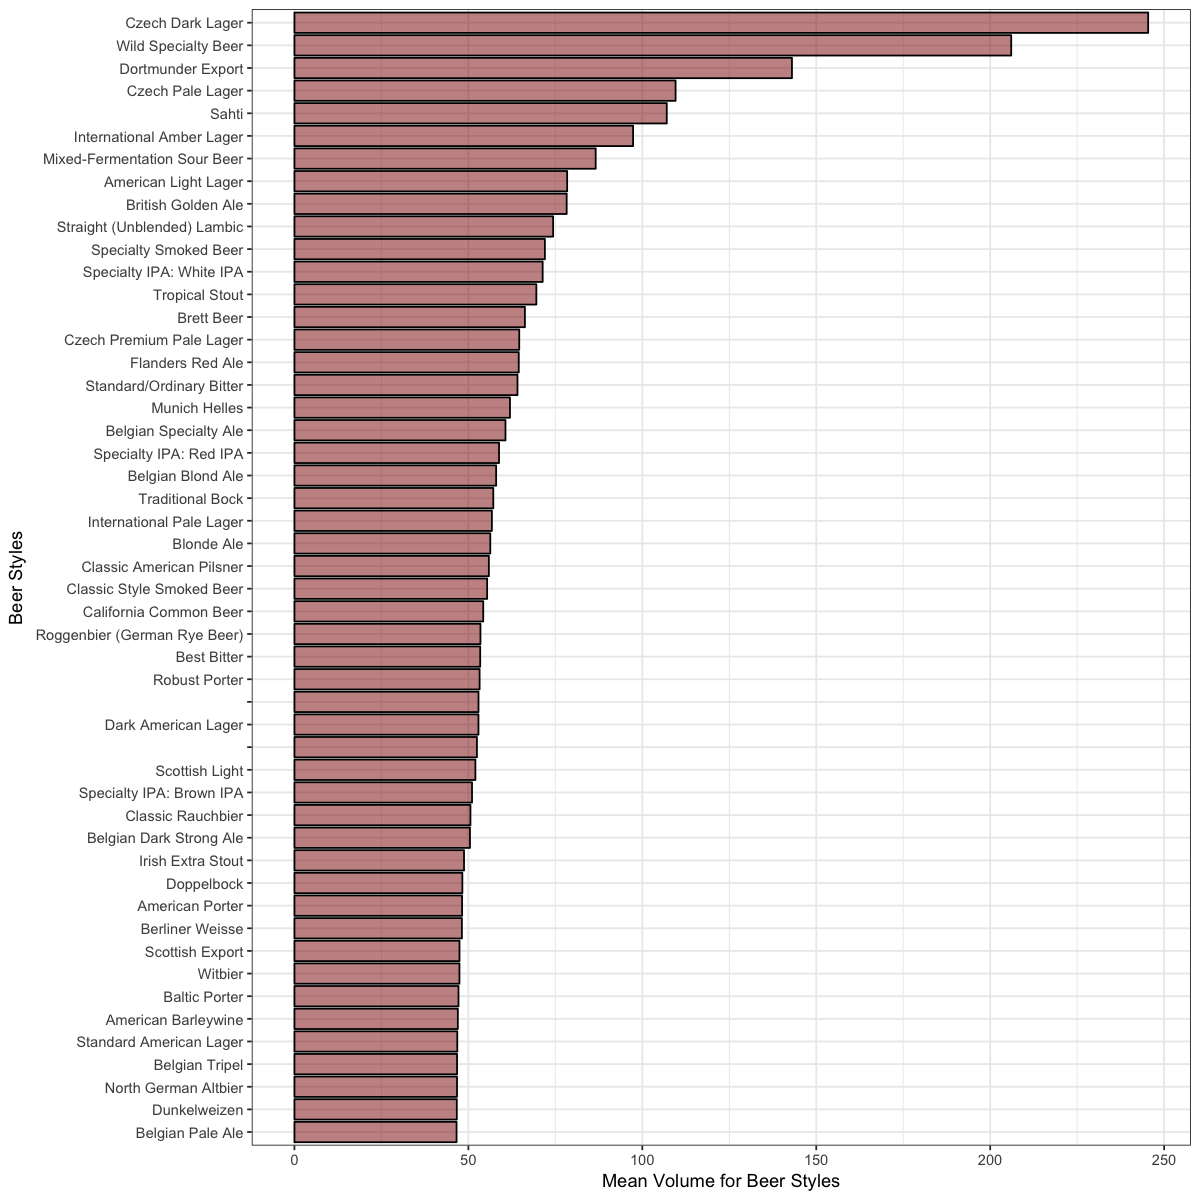

In [126]:
options(repr.plot.width = 10, repr.plot.height = 10)
recipes %>%
group_by(Style) %>%
summarise(
    mean_volume = mean(`Size(L)`, na.rm = TRUE),
) %>%
top_n(n = 50) %>%
ggplot(aes(reorder(Style, mean_volume), mean_volume))+
geom_bar(stat = "identity", fill = "darkred", color = "black", alpha = 0.5)+
labs(x = "Beer Styles", y = "Mean Volume for Beer Styles")+
coord_flip()+
theme_bw()

Selecting by mean_volume


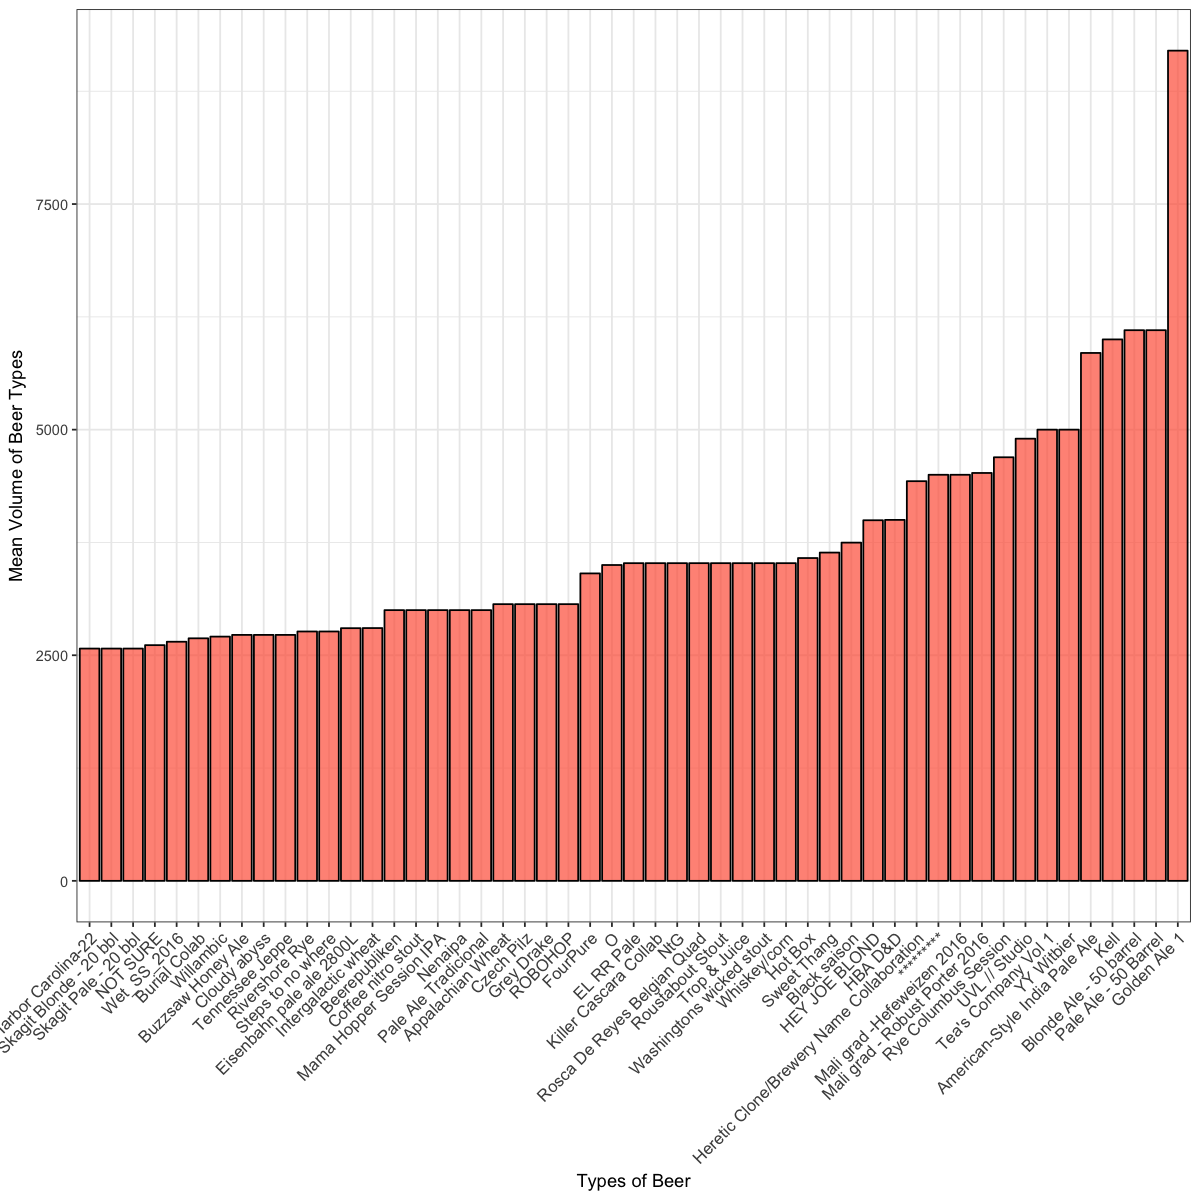

In [131]:
options(repr.plot.width = 10, repr.plot.height = 10)
recipes %>%
group_by(Name) %>%
summarise(
    mean_volume = mean(`Size(L)`, na.rm = TRUE),
) %>%
top_n(n = 50) %>%
ggplot(aes(reorder(Name, mean_volume), mean_volume))+
geom_bar(stat = "identity", fill = "tomato", color = "black", alpha = 0.7)+
labs(x = "Types of Beer", y = "Mean Volume of Beer Types")+
theme_bw()+
theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 10))

## **Priming Method**

Selecting by count_


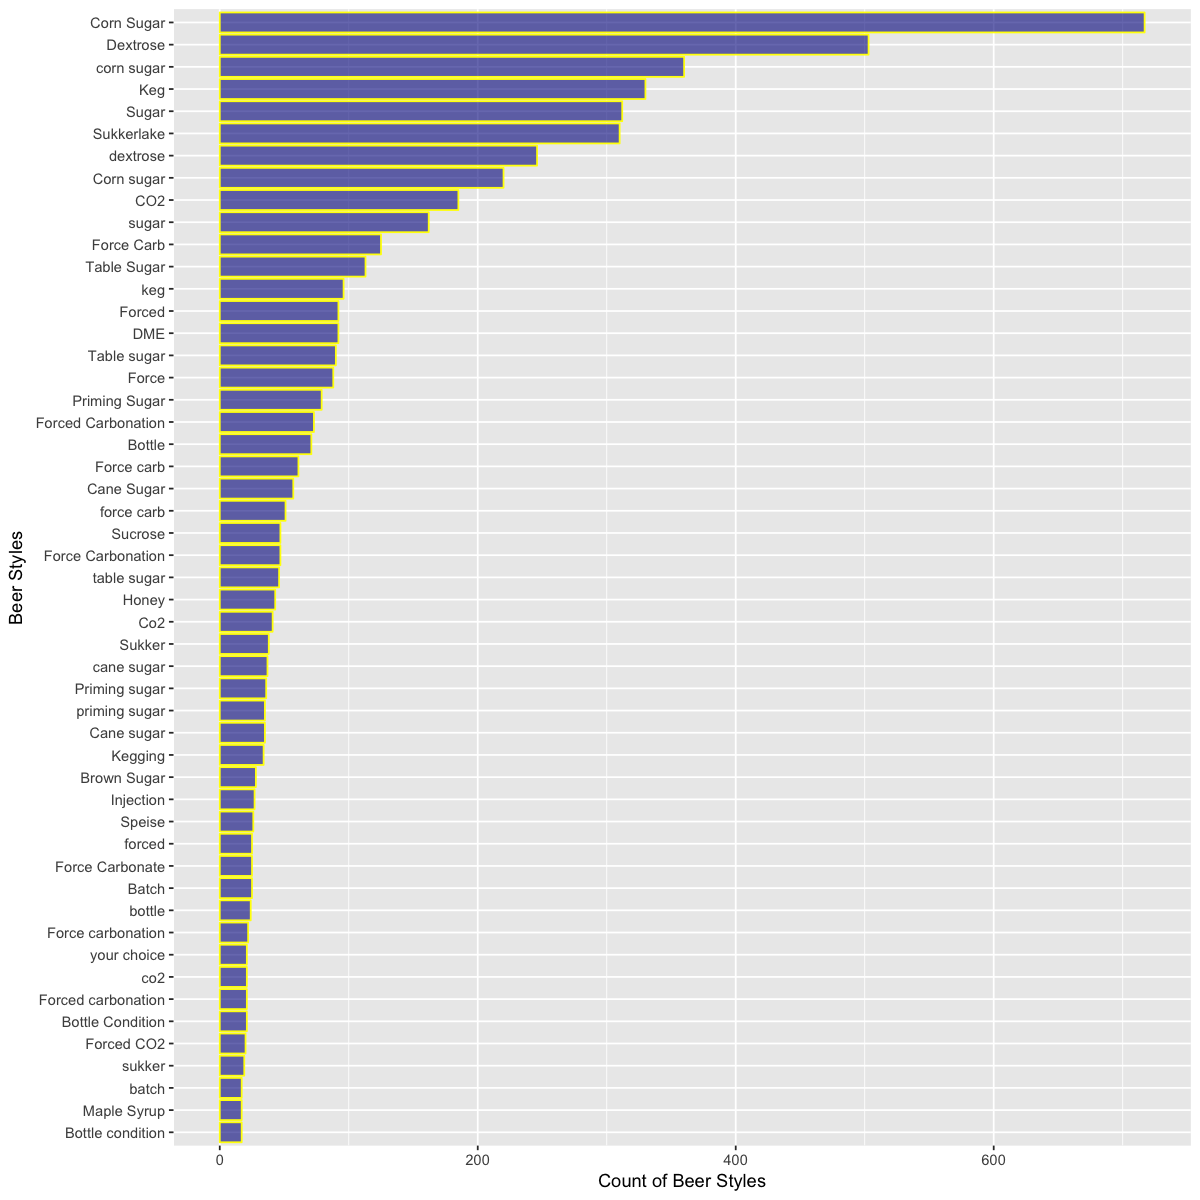

In [161]:
options(repr.plot.width = 10, repr.plot.height = 10)
recipes %>%
filter(PrimingMethod != "N/A") %>%
group_by(PrimingMethod) %>%
summarise(
    count_ = length(PrimingMethod),
) %>%
top_n(n = 50) %>%
ggplot(aes(reorder(PrimingMethod, count_), count_))+
geom_bar(stat = "identity", fill = "darkblue", color = "yellow", alpha = 0.6)+
labs(x = "Beer Styles", y = "Count of Beer Styles")+
coord_flip()

Corn sugar is the most common priming method used by people. We see that there are multiple ways in which corn sugar has been included in the recipe - "Corn Sugar", "corn sugar", "Corn sugar"! So corn sugar's count will be even higher

## **Darkest Beers and Lightest Beers**

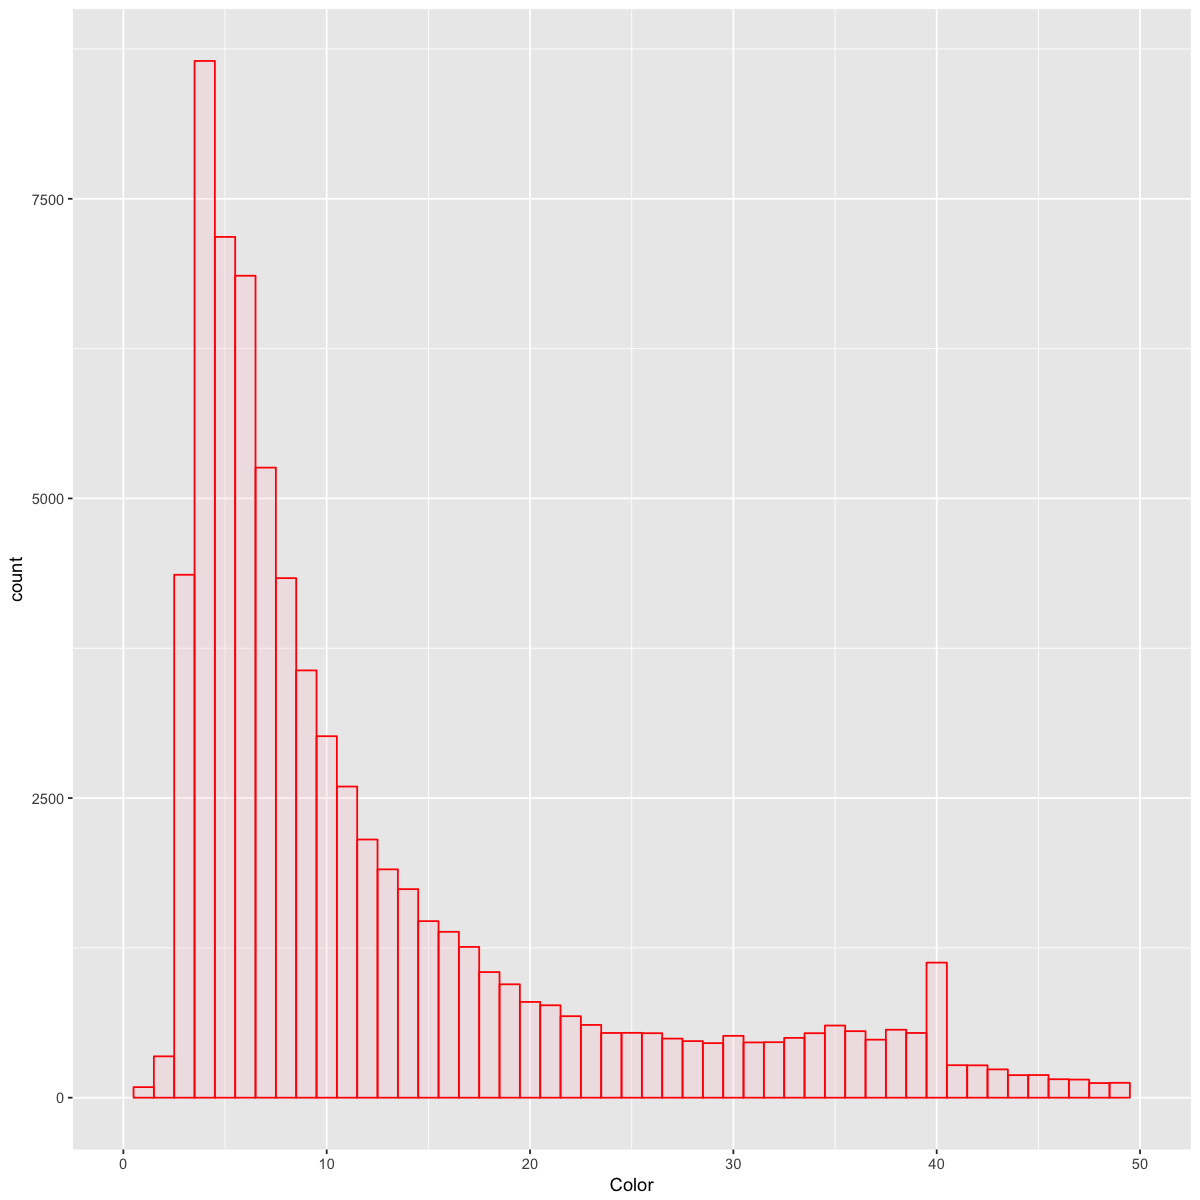

In [117]:
recipes %>%
filter(Color != 0) %>%
ggplot(aes(Color))+
geom_histogram(color = "red",fill = "pink", binwidth = 1, alpha = .2)+
xlim(0, 50)

Woah! So most beers have dilute type of color with the highest between 0-10. However, there is a sharp peak at 40. Lets look at which beers are the darkest and which are the lightest in color

## **Top Darkest Beers**

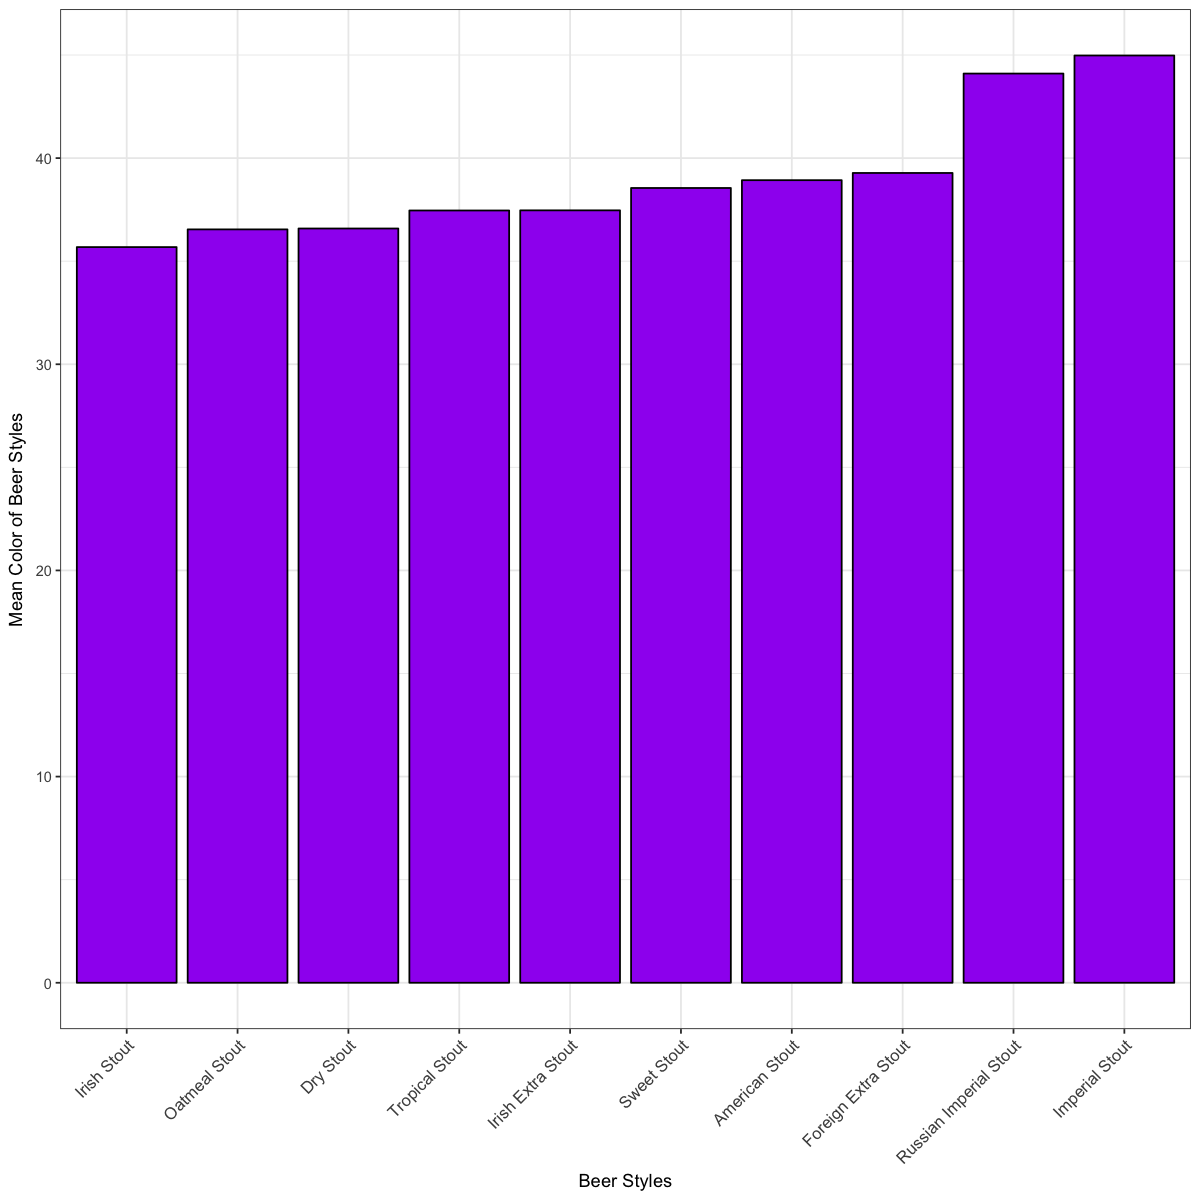

In [156]:
recipes %>%
group_by(Style) %>%
summarise(
    mean_color = mean(Color, na.rm = TRUE)
) %>%
arrange(desc(mean_color)) %>%
mutate(Style = reorder(Style, mean_color)) %>%
head(10) %>%
ggplot(aes(Style, mean_color))+
geom_bar(stat = "identity", fill = "purple", color = "black")+
labs(x = "Beer Styles", y = "Mean Color of Beer Styles")+
theme_bw()+
theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 10))

## **Top Lightest Beers**

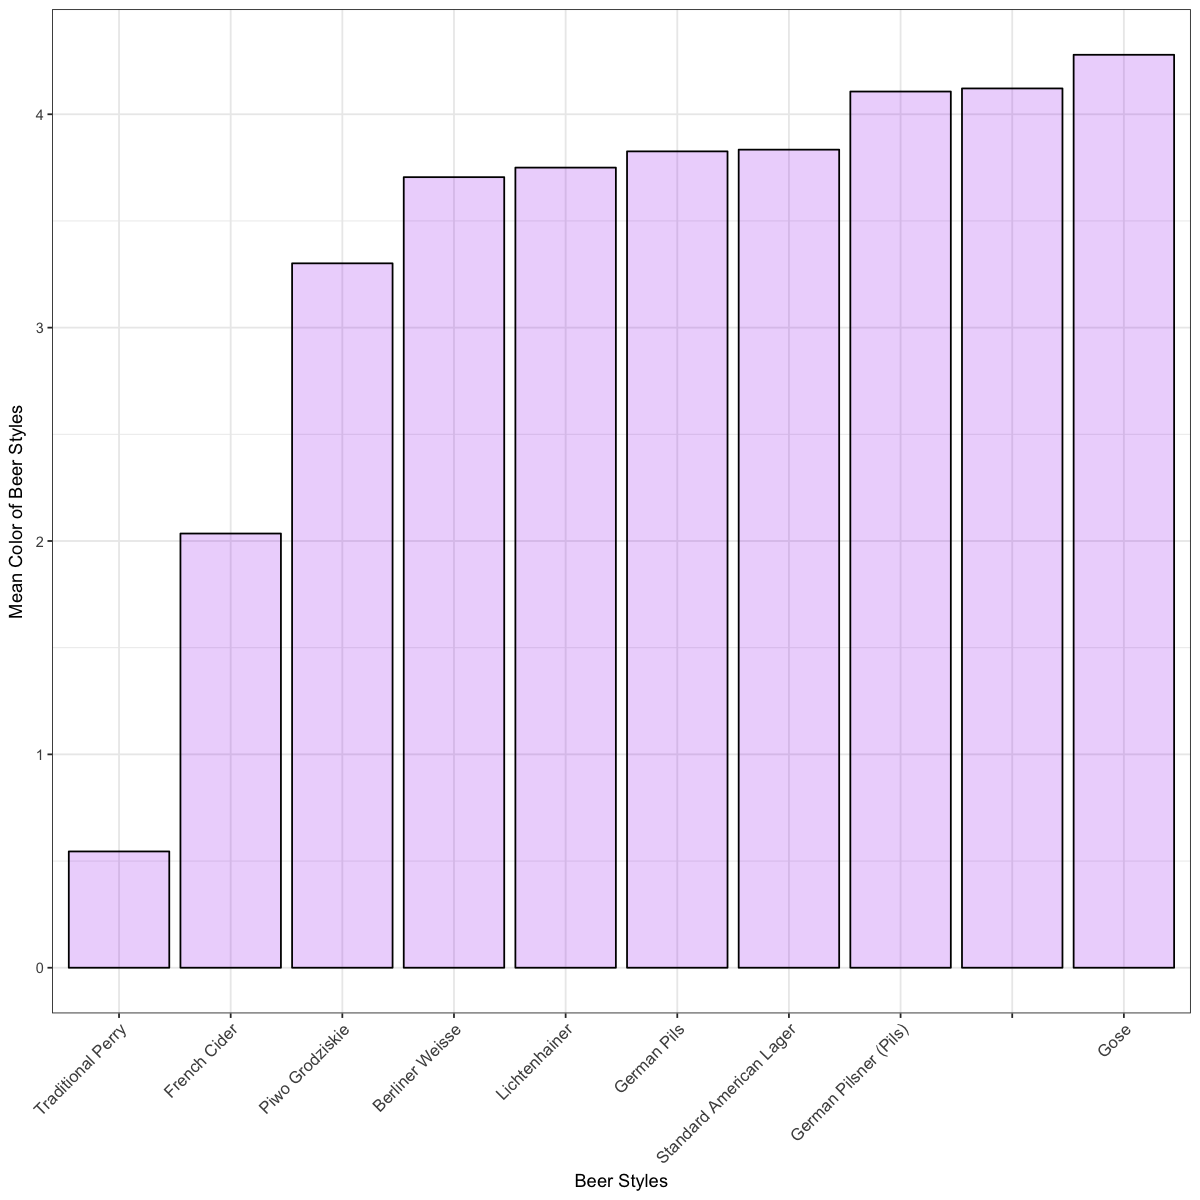

In [159]:
recipes %>%
group_by(Style) %>%
summarise(
    mean_color = mean(Color, na.rm = TRUE)
) %>%
arrange(mean_color) %>%
mutate(Style = reorder(Style, mean_color)) %>%
head(10) %>%
ggplot(aes(Style, mean_color))+
geom_bar(stat = "identity", fill = "purple", color = "black", alpha = 0.2)+
labs(x = "Beer Styles", y = "Mean Color of Beer Styles")+
theme_bw()+
theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 10))

## **Correlations between Variables**
Lets look at the correlation between the different variables/parameters for a beer

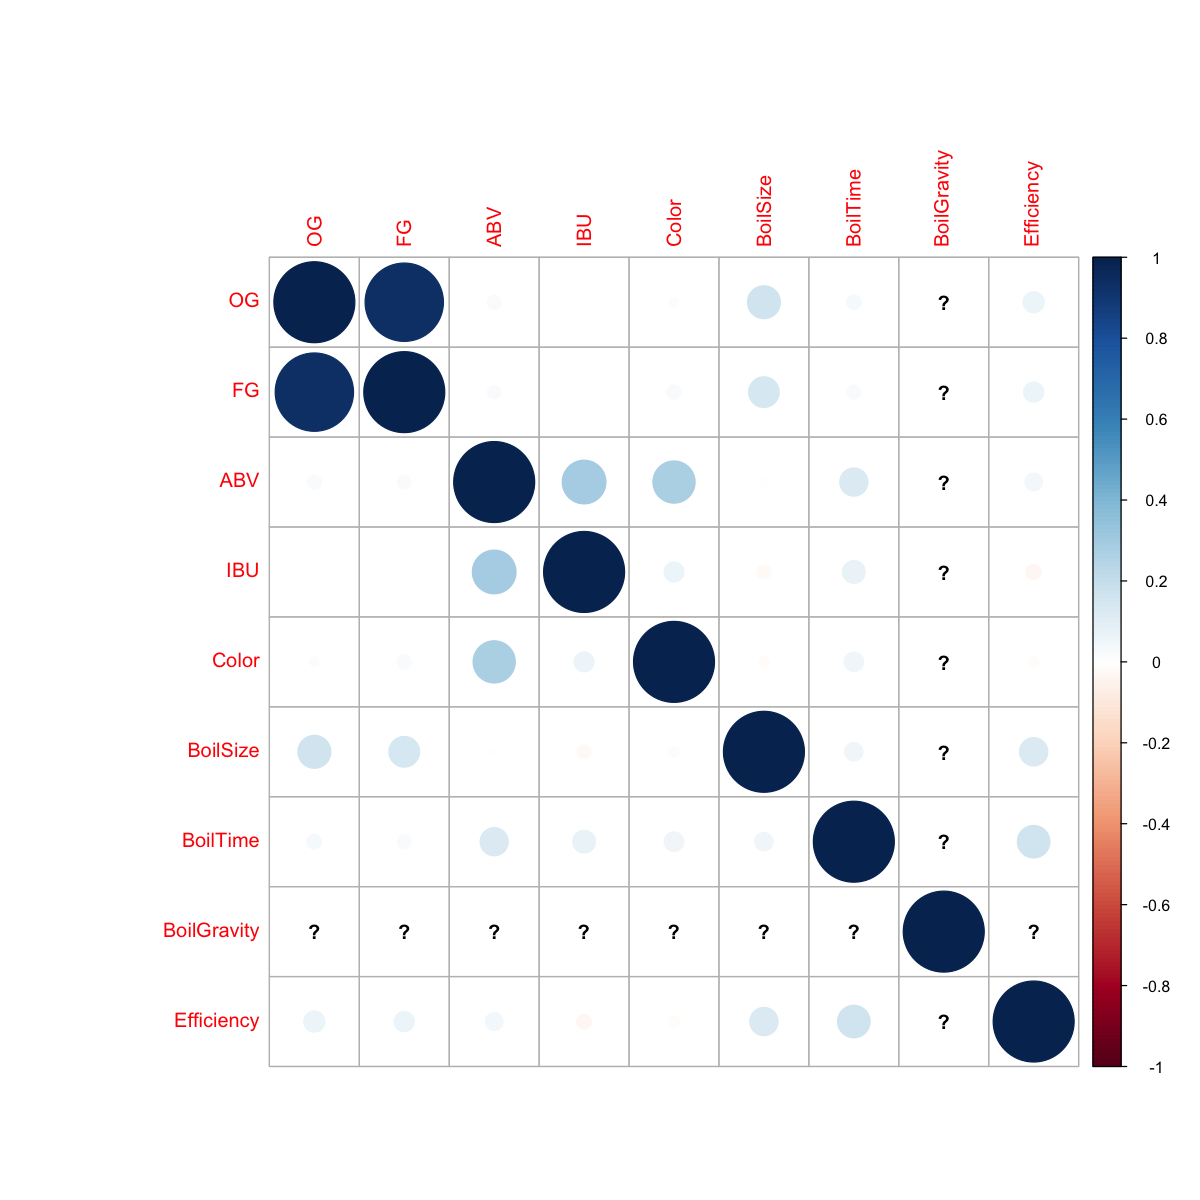

In [70]:
columns_for_correlation <- c("OG", "FG", "ABV", "IBU", "Color", "BoilSize", "BoilTime", "BoilGravity", "Efficiency")

recipes$BoilGravity <- as.numeric(recipes$BoilGravity)
df_ <- select(recipes, columns_for_correlation)
correlations <- cor(df_)
corrplot(correlations, method = "circle")

We see that OG and FG are the most related to each other and the other parameters of beer. As we can guess, the bitterness and alcoholic content of a beer are also slightly related to each other. Also, color is related to the amount of alcohol in the beer.

## **Relation between Bitterness and Alcohol Content**
By a logical guess, more the ABV more should be the bitterness content. Lets see whether this is true or not

`geom_smooth()` using method = 'gam'


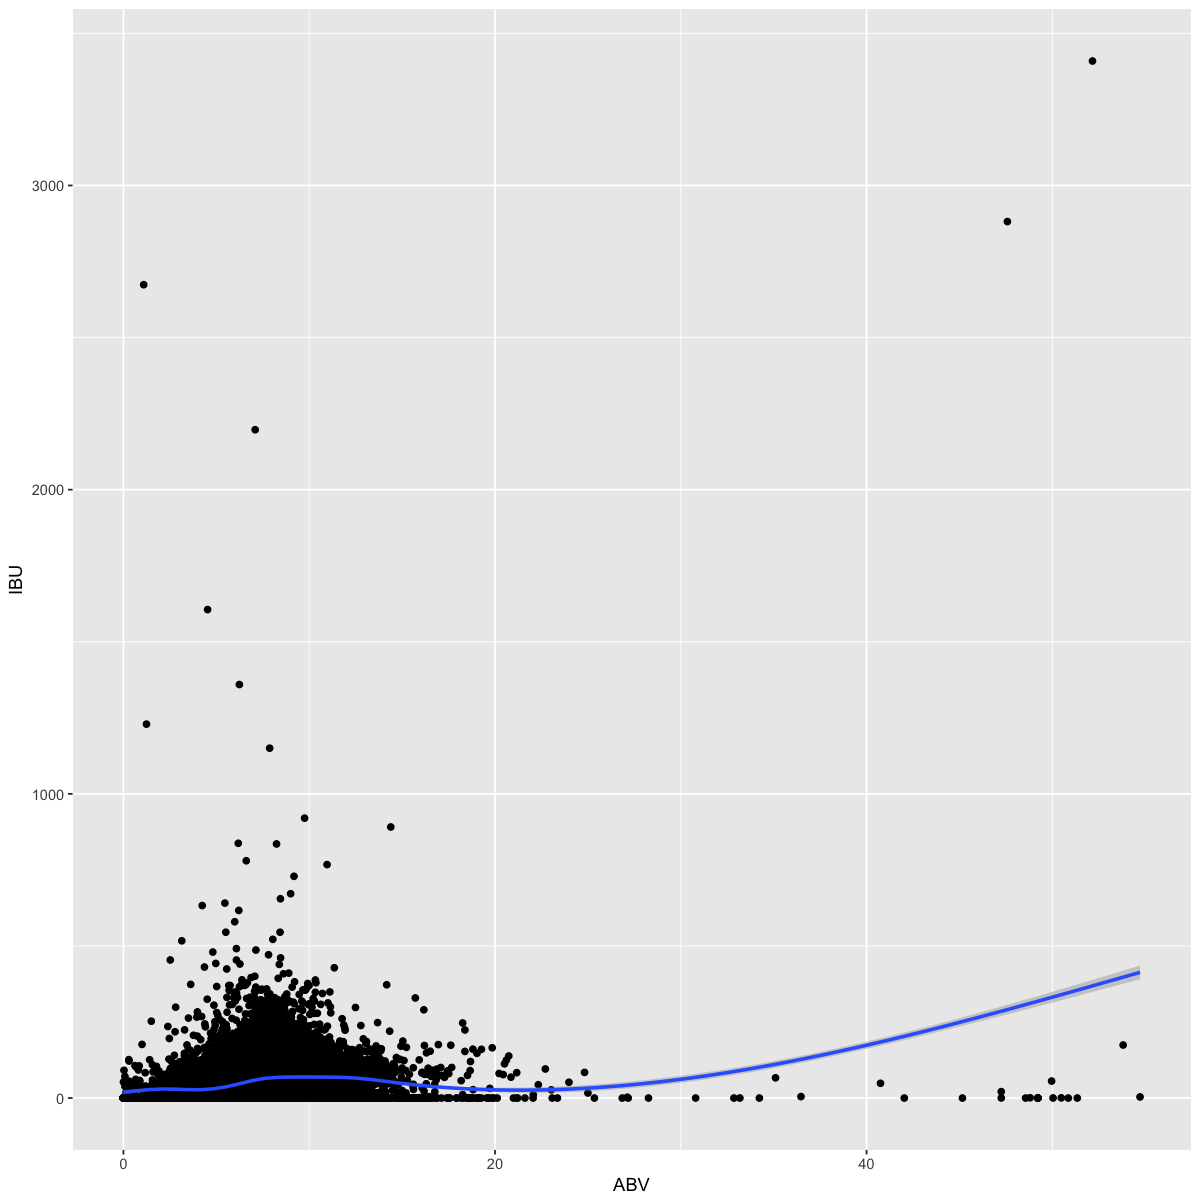

In [47]:
recipes %>%
ggplot(aes(ABV, IBU))+
geom_point()+
geom_smooth()

This is nowhere near the linear relation we guessed. I think we have too many 0 values in IBU which prevents us from looking at the overall pattern. Lets remove them:

`geom_smooth()` using method = 'gam'


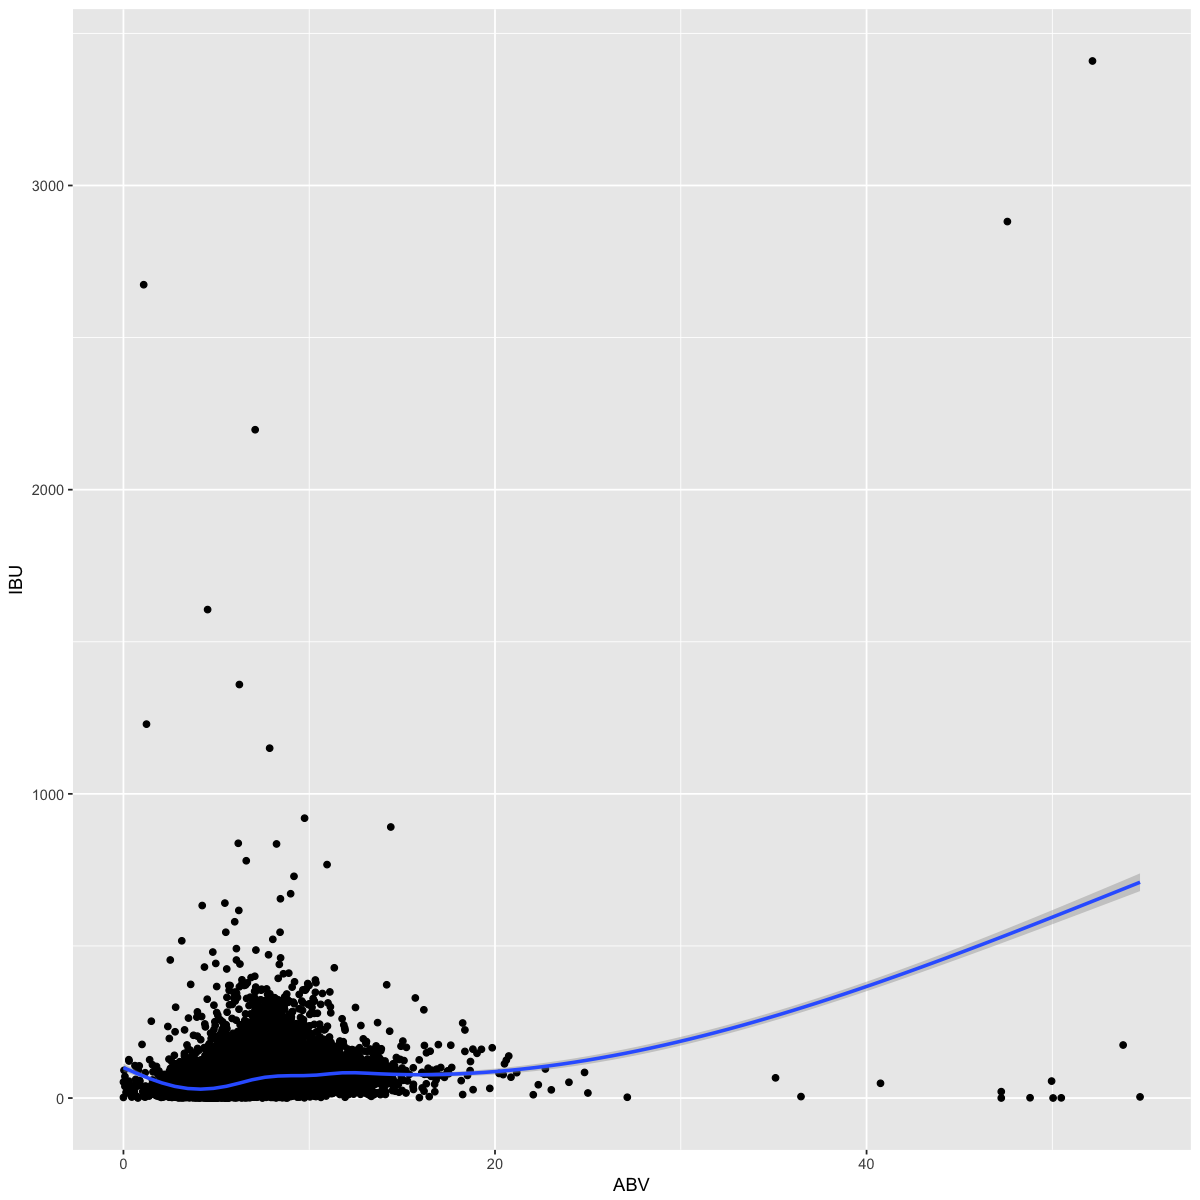

In [53]:
recipes %>%
filter(IBU > 0) %>%
ggplot(aes(ABV, IBU))+
geom_point()+
geom_smooth()

Although not so much linear, this graph does reflect the results we see in the correlation plot. There is a small correlation between alcoholic content of a beer and the bitterness

## **Color and Alcoholic Content**

`geom_smooth()` using method = 'gam'


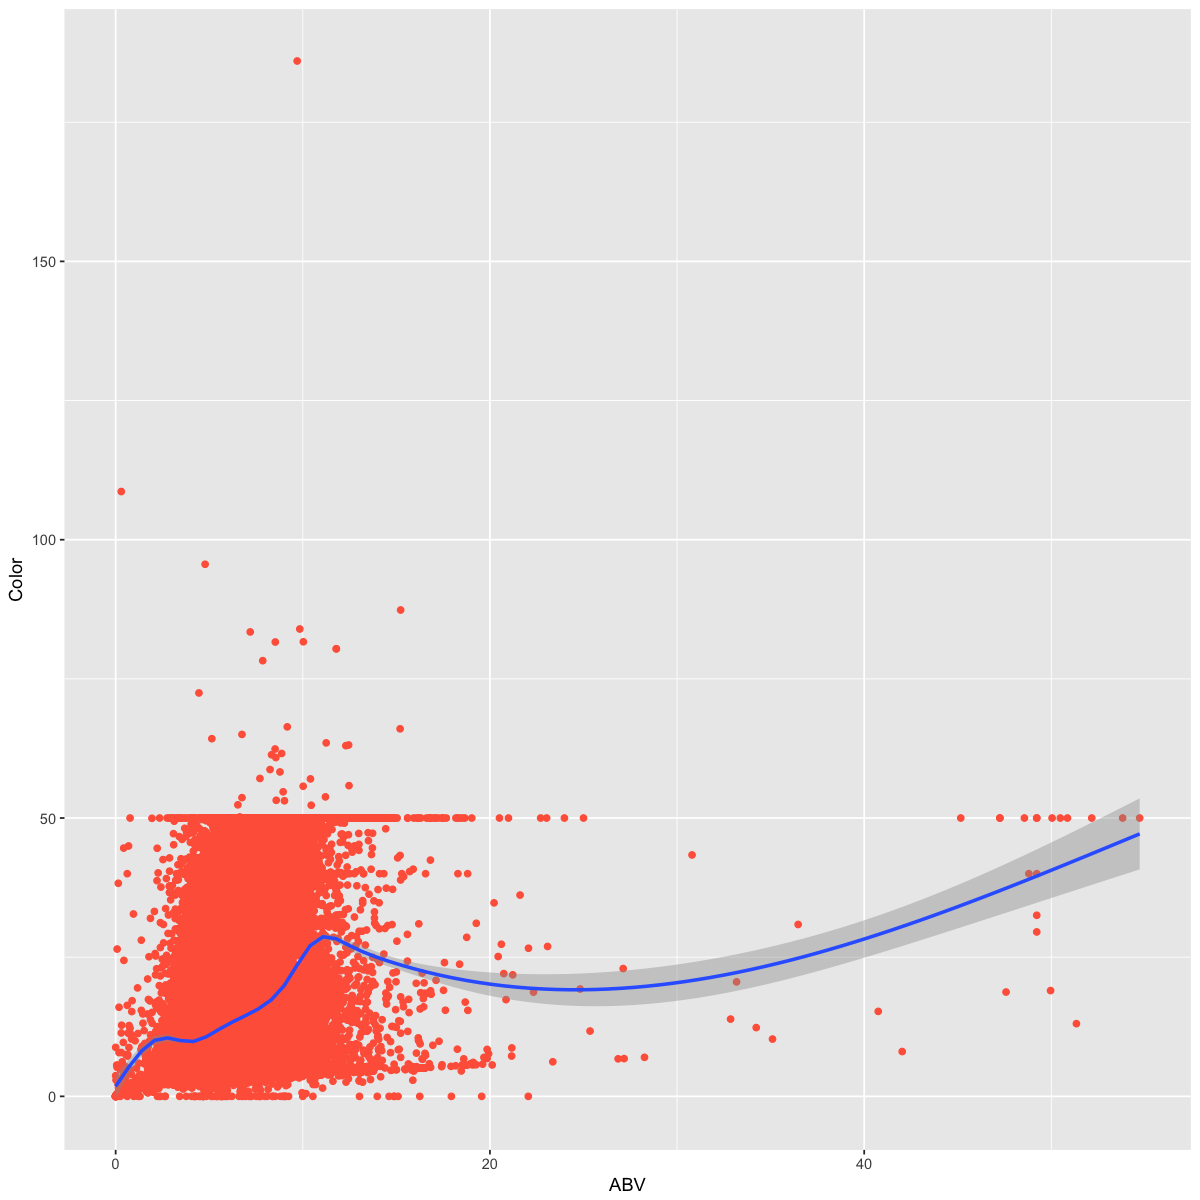

In [165]:
recipes %>%
ggplot(aes(ABV, Color))+
geom_point(color = "tomato")+
geom_smooth()

The above graph does indicate a more stronger relation of ABV with the Color of a beer than with the bitterness. Thus, a dark colored beer would have more alcoholic content. Lets look at how this correlates with the beers we have.

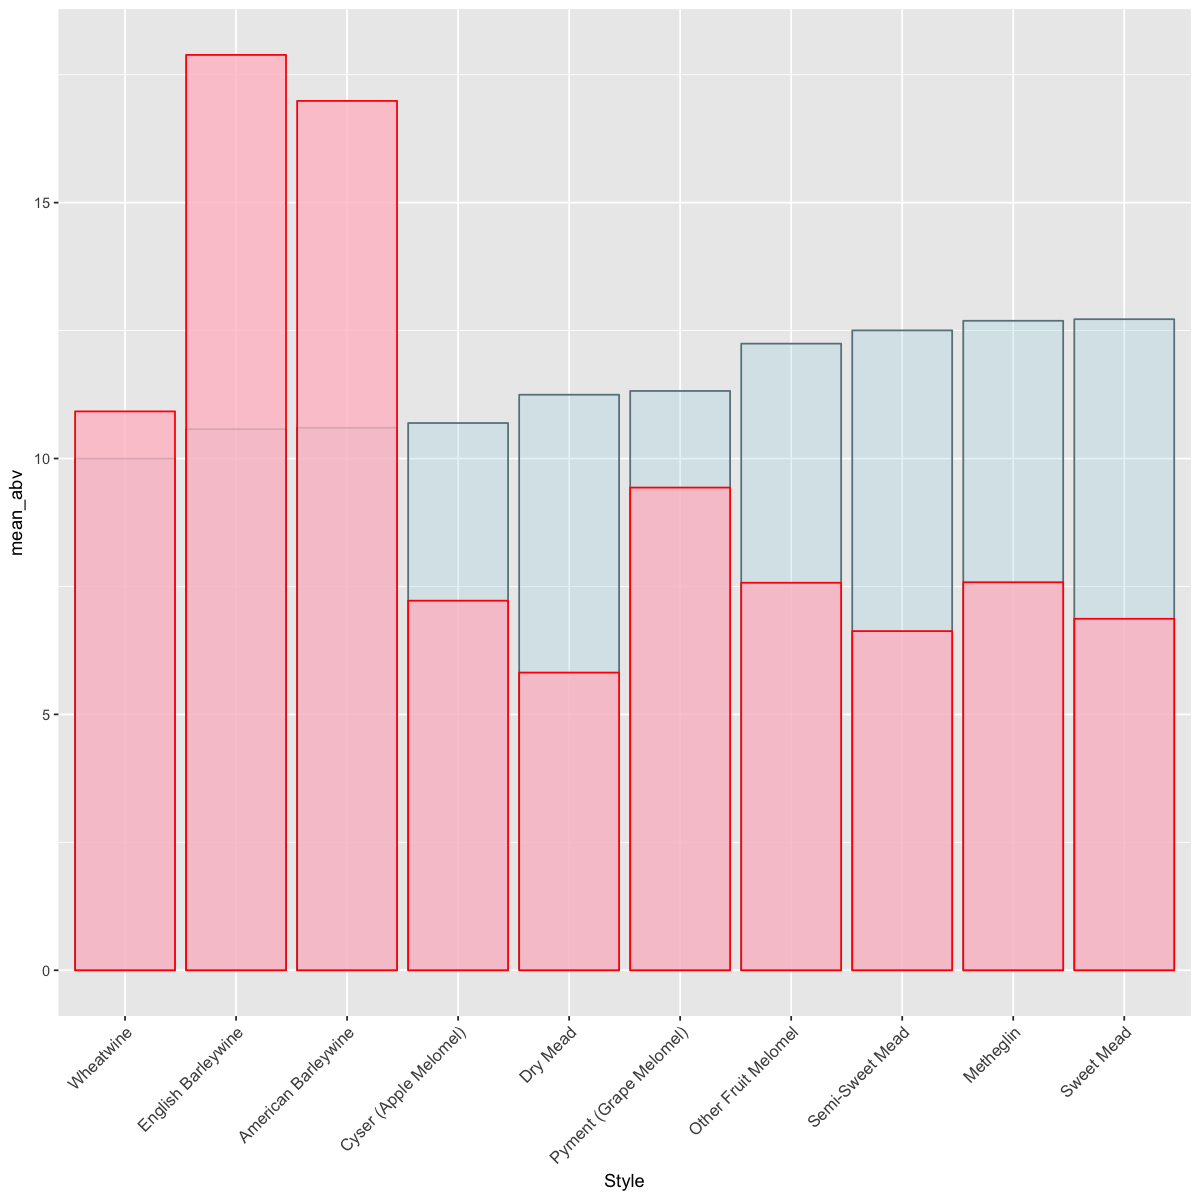

In [179]:
recipes %>%
group_by(Style) %>%
summarise(
    mean_abv = mean(ABV, na.rm = TRUE),
    mean_color = mean(Color, na.rm = TRUE)
) %>%
arrange(desc(mean_abv)) %>%
mutate(Style = reorder(Style, mean_abv)) %>%
head(10) %>%
ggplot(aes(x = Style))+
geom_bar(aes(y = mean_abv), stat = "identity", position = "identity", fill = 'lightblue',color = 'lightblue4', alpha = 0.3)+
geom_bar(aes(y = mean_color), stat = "identity", position = "identity", fill = 'pink',color = 'red', alpha = 0.8)+
theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 10)) 

Woah!! This indicates an altogether negative relationship between alcoholic nature and the color. The most alcoholic beer style has the least color and vice-versa.

In [71]:
glimpse(recipes)

Observations: 73,861
Variables: 22
$ BeerID        <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16...
$ Name          <chr> "Vanilla Cream Ale", "Southern Tier Pumking clone", "...
$ URL           <chr> "/homebrew/recipe/view/1633/vanilla-cream-ale", "/hom...
$ Style         <chr> "Cream Ale", "Holiday/Winter Special Spiced Beer", "A...
$ StyleID       <int> 45, 85, 7, 7, 20, 10, 86, 45, 129, 86, 7, 7, 7, 7, 7,...
$ `Size(L)`     <dbl> 21.77, 20.82, 18.93, 22.71, 50.00, 24.61, 22.71, 20.8...
$ OG            <dbl> 1.055, 1.083, 1.063, 1.061, 1.060, 1.055, 1.072, 1.05...
$ FG            <dbl> 1.013, 1.021, 1.018, 1.017, 1.010, 1.013, 1.018, 1.01...
$ ABV           <dbl> 5.48, 8.16, 5.91, 5.80, 6.48, 5.58, 7.09, 5.36, 5.77,...
$ IBU           <dbl> 17.65, 60.65, 59.25, 54.48, 17.84, 40.12, 268.71, 19....
$ Color         <dbl> 4.83, 15.64, 8.98, 8.50, 4.57, 8.00, 6.33, 5.94, 34.7...
$ BoilSize      <dbl> 28.39, 24.61, 22.71, 26.50, 60.00, 29.34, 30.28, 28.3...
$ BoilTime      <